In [1]:
%matplotlib inline

import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
import seaborn
seaborn.set_context({"figure.figsize": (16, 8)})
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

In [2]:
def do_plots(species, label, root="../data", lengthticks=[3, 4, 5, 6],
             lengthticklabs=['1,000', '10,000', '100,000', '1,000,000'],
             lengthbins=numpy.linspace(2.75, 6.0, 40),
             gcbins=numpy.linspace(20, 80, 40)):
    ilocusdata = pandas.read_table('{}/{}/{}.iloci.tsv'.format(root, species, species))
    milocusdata = pandas.read_table('{}/{}/{}.miloci.tsv'.format(root, species, species))
    ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
    milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
    siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
    miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
    singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
    singleton_locuspos = [lp[6:-1] for lp in singleton_siloci['LocusPos']]
    milocus_siloci = siloci.loc[~(siloci.LocusPos.isin(singleton_locuspos))]
    fig, axes = plt.subplots(1, 2)
    ax1, ax2 = axes
    _ = ax1.hist(singleton_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.hist(milocus_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.set_title('siLocus Length ({})'.format(label))
    _ = ax1.set_xlabel('Length (bp)')
    _ = ax1.set_ylabel('Frequency')
    _ = ax1.legend(loc='upper right', labels=('Unmerged', 'Merged'))
    if lengthticks:
        _ = ax1.set_xticks(lengthticks)
    if lengthticklabs:
        _ = ax1.set_xticklabels(lengthticklabs)
    _ = ax2.hist(singleton_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.hist(milocus_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.set_title('siLocus Nucleotide Composition ({})'.format(label))
    _ = ax2.set_xlabel('% GC Content')
    _ = ax2.set_ylabel('Frequency')
    _ = ax2.legend(loc='upper right', labels=('Unmerged', 'Merged'))

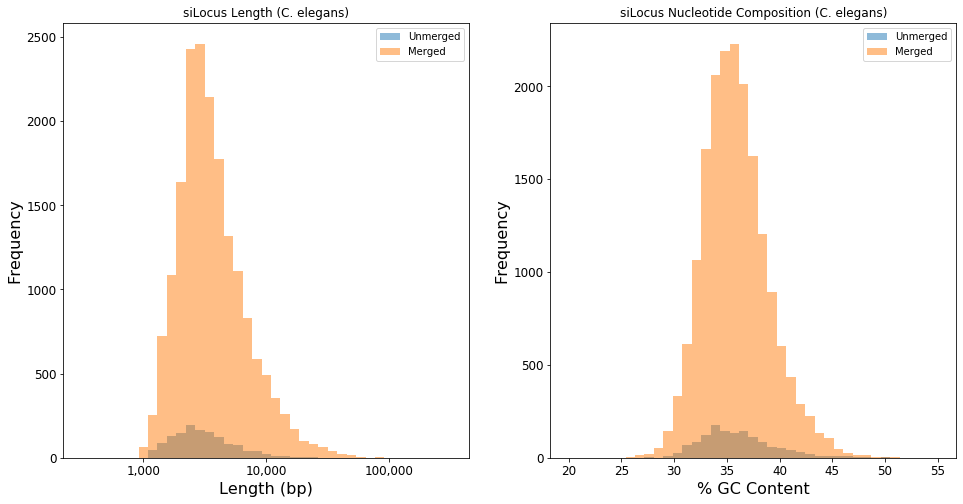

In [3]:
do_plots('Cele', 'C. elegans', "../data", lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 55, 40))

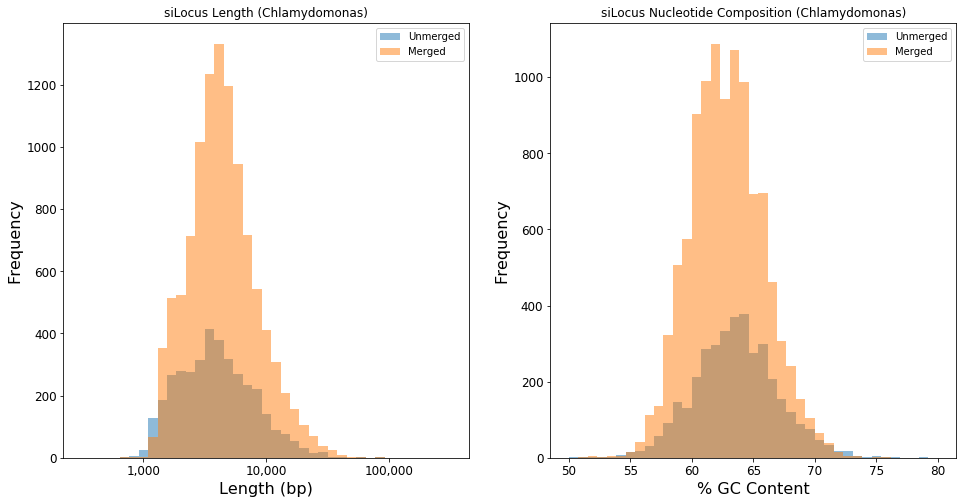

In [4]:
do_plots('Crei', 'Chlamydomonas', '../data', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(50, 80, 40))

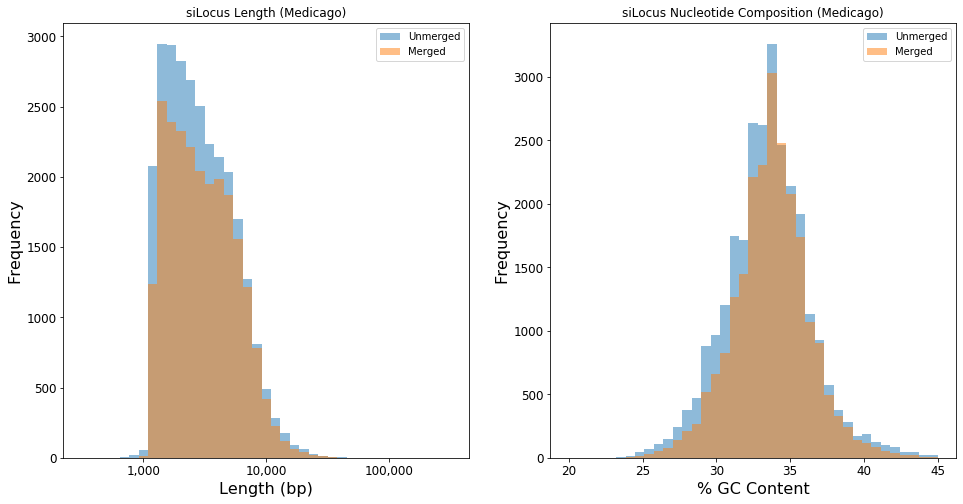

In [5]:
do_plots('Mtru', 'Medicago', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 45, 40))

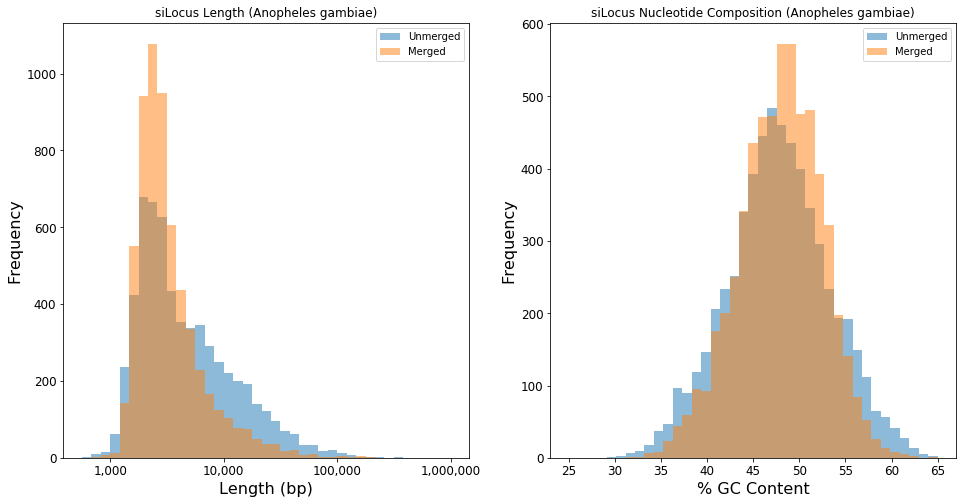

In [6]:
do_plots('Agam', 'Anopheles gambiae', gcbins=numpy.linspace(25, 65, 40))

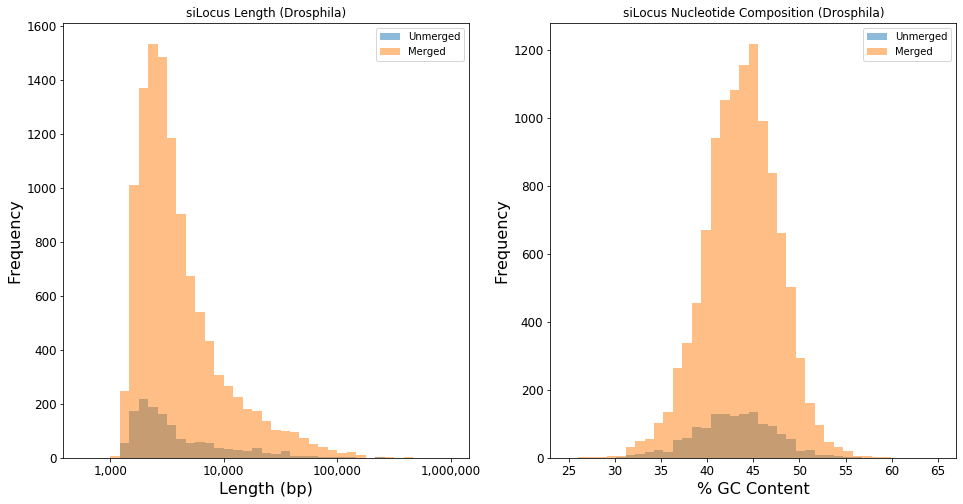

In [7]:
do_plots('Dmel', 'Drosphila', gcbins=numpy.linspace(25, 65, 40))

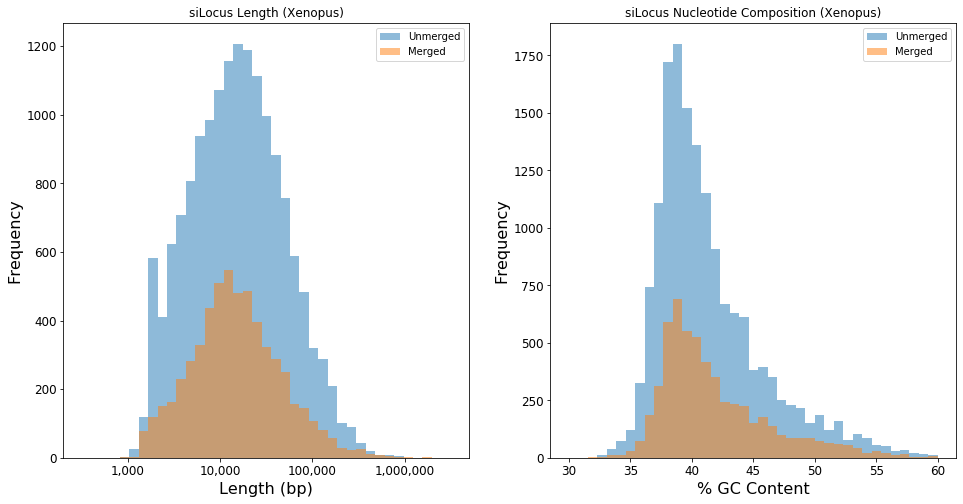

In [8]:
do_plots('Xtro', 'Xenopus', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 60, 40))

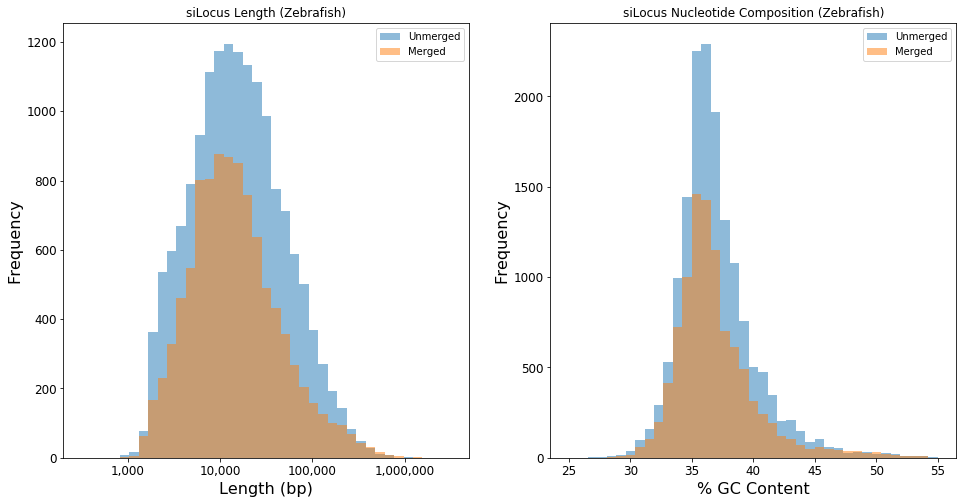

In [9]:
do_plots('Drer', 'Zebrafish', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(25, 55, 40))

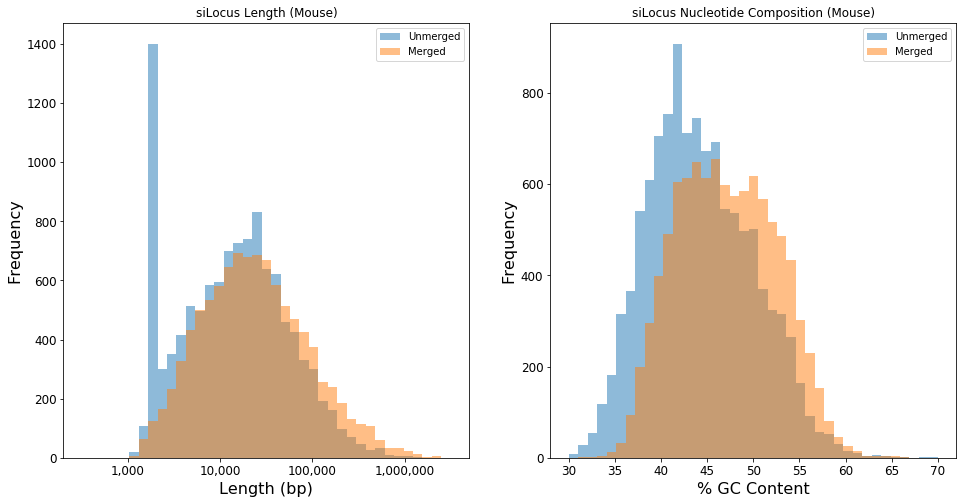

In [10]:
do_plots('Mmus', 'Mouse', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 70, 40))

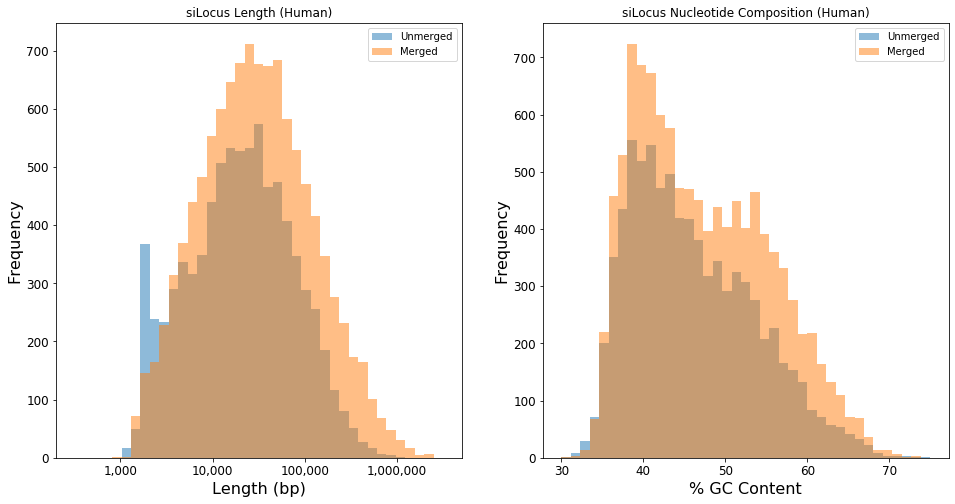

In [11]:
do_plots('Hsap', 'Human', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 75, 40))

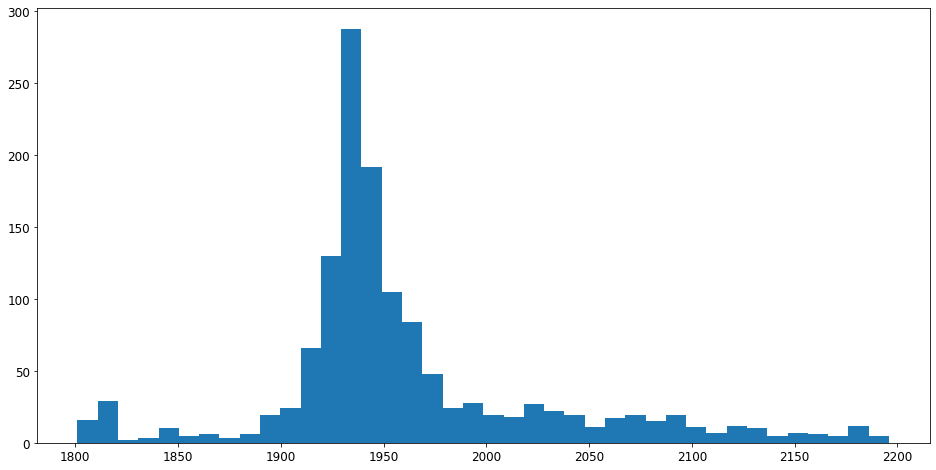

In [12]:
root = '../data'
species = 'Mmus'
ilocusdata = pandas.read_table('{}/{}/{}.iloci.tsv'.format(root,species, species))
milocusdata = pandas.read_table('{}/{}/{}.miloci.tsv'.format(root,species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [13]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
34493,Mmus,MmusILC-34494,NC_000076.6,NC_000076.6_130073912-130075850,1939,1939,0.350,-0.201,0.0,siLocus,1,False,NaN,3.287578
11741,Mmus,MmusILC-11742,NC_000070.6,NC_000070.6_52970129-52972067,1939,1939,0.394,-0.104,0.0,siLocus,1,False,NaN,3.287578
56063,Mmus,MmusILC-56064,NC_000086.7,NC_000086.7_12651383-12653321,1939,1939,0.460,0.056,0.0,siLocus,1,False,NaN,3.287578
24235,Mmus,MmusILC-24236,NC_000073.6,NC_000073.6_103559979-103561920,1942,1942,0.385,-0.075,0.0,siLocus,1,False,NaN,3.288249
54761,Mmus,MmusILC-54762,NC_000085.6,NC_000085.6_13233752-13235684,1933,1933,0.367,-0.121,0.0,siLocus,1,False,NaN,3.286232


In [14]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
54688,Mmus,MmusILC-54689,NC_000085.6,NC_000085.6_12209068-12211006,1939,1939,0.394,-0.084,0.0,siLocus,1,False,NaN,3.287578
51545,Mmus,MmusILC-51546,NC_000083.6,NC_000083.6_37210413-37212351,1939,1939,0.515,0.009,0.0,siLocus,1,False,NaN,3.287578
35289,Mmus,MmusILC-35290,NC_000077.6,NC_000077.6_49317048-49318983,1936,1936,0.446,0.017,0.0,siLocus,1,False,NaN,3.286905
24567,Mmus,MmusILC-24568,NC_000073.6,NC_000073.6_108316396-108318328,1933,1933,0.373,-0.062,0.0,siLocus,1,False,NaN,3.286232
29391,Mmus,MmusILC-29392,NC_000075.6,NC_000075.6_38515534-38517465,1932,1932,0.351,0.009,0.0,siLocus,1,False,NaN,3.286007


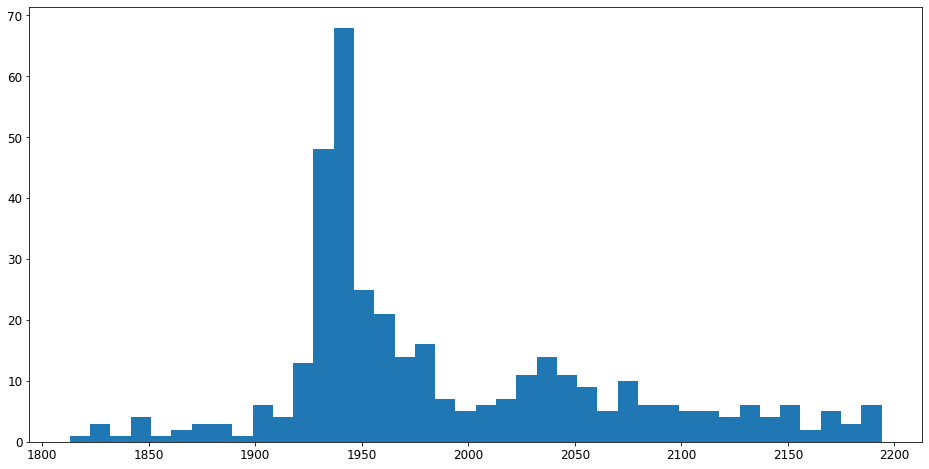

In [15]:
root = '../data'
species = 'Hsap'
ilocusdata = pandas.read_table('{}/{}/{}.iloci.tsv'.format(root,species, species))
milocusdata = pandas.read_table('{}/{}/{}.miloci.tsv'.format(root,species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [16]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
18361,Hsap,HsapILC-18362,NC_000005.10,NC_000005.10_176388283-176390250,1968,0,0.559,-0.010,0.0,siLocus,1,False,NaN,3.294025
57475,Hsap,HsapILC-57476,NC_000023.11,NC_000023.11_89921441-89923383,1943,1943,0.442,0.002,0.0,siLocus,1,False,NaN,3.288473
35533,Hsap,HsapILC-35534,NC_000012.12,NC_000012.12_11185493-11187437,1945,1945,0.361,0.001,0.0,siLocus,1,False,NaN,3.288920
24422,Hsap,HsapILC-24423,NC_000007.14,NC_000007.14_144003497-144005432,1936,1936,0.452,-0.058,0.0,siLocus,1,False,NaN,3.286905
50549,Hsap,HsapILC-50550,NC_000019.10,NC_000019.10_15740893-15742843,1951,1951,0.420,-0.073,0.0,siLocus,1,False,NaN,3.290257


In [17]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
36368,Hsap,HsapILC-36369,NC_000012.12,NC_000012.12_55293788-55295732,1945,1945,0.366,0.018,0.0,siLocus,1,False,NaN,3.288920
39407,Hsap,HsapILC-39408,NC_000014.9,NC_000014.9_20013761-20015693,1933,1933,0.355,0.092,0.0,siLocus,1,False,NaN,3.286232
5721,Hsap,HsapILC-05722,NC_000001.11,NC_000001.11_248202568-248204506,1939,1939,0.396,-0.156,0.0,siLocus,1,False,NaN,3.287578
3771,Hsap,HsapILC-03772,NC_000001.11,NC_000001.11_158398022-158399966,1945,1945,0.394,0.050,0.0,siLocus,1,False,NaN,3.288920
24429,Hsap,HsapILC-24430,NC_000007.14,NC_000007.14_144094608-144096540,1933,1933,0.435,-0.027,0.0,siLocus,1,False,NaN,3.286232
